# PastaStore plot and map utilities<a id="top"></a>

This notebook shows the `PastaStore` functionality for quickly plotting timeseries, or plotting metadata or models (timeseries locations) on a map.

<div class="alert alert-block alert-warning">
<b>Note:</b> The plotting methods in PastaStore are new and are still under development so please submit an issue if you come across some unusual or undesirable behavior. But definitely do try it out and let us know what you think!</div>

## Content
1. [Populate a PastaStore with some data](#Populate-a-PastaStore-with-some-data)
2. [Maps](#Maps)
   1. [Oseries locations](#Oseries-locations)
   2. [All stresses](#All-stresses)
   2. [Model locations](#Model-locations)
   3. [Model statistics](#Model-statistics)
   4. [A single model and its time series](#A-single-model-and-its-time-series)
3. [Plots](#Plots)
   1. [Plot oseries](#Plot-oseries)
   2. [Plot stresses](#Plot-stresses)
   3. [Data availability](#Data-availability)

<hr>

In [1]:
import sys
import os

import matplotlib.pyplot as plt
import pandas as pd
import pastastore as pst
import pastas as ps

sys.path.insert(1, "../../tests")
from conftest import initialize_project

In [2]:
ps.logger.setLevel("ERROR") # silence Pastas for this notebook
ps.show_versions()

Python version: 3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
Numpy version: 1.21.2
Scipy version: 1.5.2
Pandas version: 1.1.5
Pastas version: 0.18.0
Matplotlib version: 3.4.1


## [Populate a PastaStore with some data](#top)

First we create a PastaStore object and add some data to it. We're using the data used by the pastastore unit tests as an example. This is some random data, but it works just perfectly to show the PastaStores plot and map methods.

In [3]:
# set up a PastaStore
conn = pst.DictConnector("database")
pstore = pst.PastaStore(name="database", connector=conn)

# add data, we're using the data used in the tests here, hence 
# the temporary change of directory
os.chdir("../..")
initialize_project(conn)
os.chdir("./examples/notebooks")

<hr>

## [Maps](#top)

PastaStore contains a `maps` attribute that exposes methods for spatially plotting data contained in our database. There are methods for plotting oseries, stress and model locations and there is also a method for plotting a single model and all the timeseries it contains. The following sections showcase each of these methods. But a map is not a map without some kind of background. The function `PastaStore.maps.add_background_map` allows you to add a background map to any axes object. The method is powered by [contextily](https://contextily.readthedocs.io/en/latest/) and basically allows users to access some of the great functionality provided by that package. Contextily is not a `pastastore` dependency but is obviously recommended, and necessary if you want to access the background maps. For a list of possible background maps, consult `PastaStore.maps._list_contextily_providers()` (see below). We'll be using a few different background map options in the plots below. The default is `OpenStreetMap.Mapnik`.

### [Background maps](#top)

In [4]:
# DataFrame of all contextily map providers
providers_df = pd.DataFrame(pstore.maps._list_contextily_providers()).T

# list all
pstore.maps._list_contextily_providers().keys()

dict_keys(['OpenStreetMap.Mapnik', 'OpenStreetMap.DE', 'OpenStreetMap.CH', 'OpenStreetMap.France', 'OpenStreetMap.HOT', 'OpenStreetMap.BZH', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest.OpenCycleMap', 'Thunderforest.Transport', 'Thunderforest.TransportDark', 'Thunderforest.SpinalMap', 'Thunderforest.Landscape', 'Thunderforest.Outdoors', 'Thunderforest.Pioneer', 'Thunderforest.MobileAtlas', 'Thunderforest.Neighbourhood', 'OpenMapSurfer.Roads', 'OpenMapSurfer.Hybrid', 'OpenMapSurfer.AdminBounds', 'OpenMapSurfer.ContourLines', 'OpenMapSurfer.Hillshade', 'OpenMapSurfer.ElementsAtRisk', 'Hydda.Full', 'Hydda.Base', 'Hydda.RoadsAndLabels', 'MapBox', 'Stamen.Toner', 'Stamen.TonerBackground', 'Stamen.TonerHybrid', 'Stamen.TonerLines', 'Stamen.TonerLabels', 'Stamen.TonerLite', 'Stamen.Watercolor', 'Stamen.Terrain', 'Stamen.TerrainBackground', 'Stamen.TopOSMRelief', 'Stamen.TopOSMFeatures', 'Esri.WorldStreetMap', 'Esri.DeLorme', 'Esri.World

### [Oseries locations](#top)

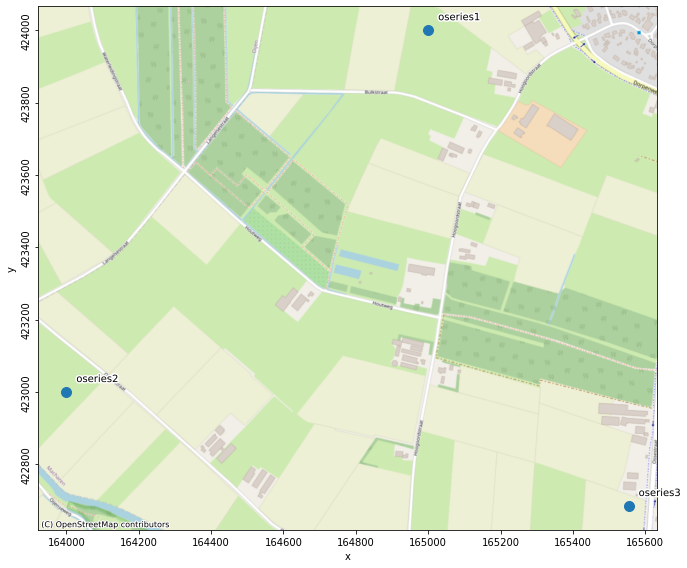

In [5]:
# plot oseries locations
ax1 = pstore.maps.oseries(labels=True, s=100)
pstore.maps.add_background_map(ax1)

### [All stresses](#top)

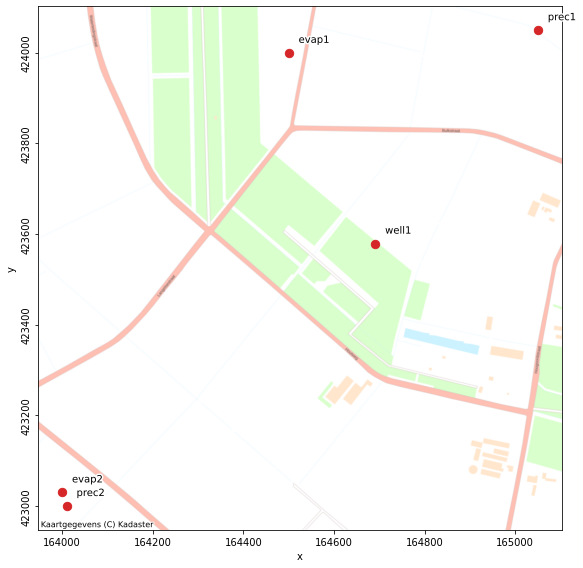

In [6]:
# plot all stresses locations
ax2 = pstore.maps.stresses(color="C3")
pstore.maps.add_background_map(ax2, map_provider="nlmaps.pastel")

### [Model locations](#top)

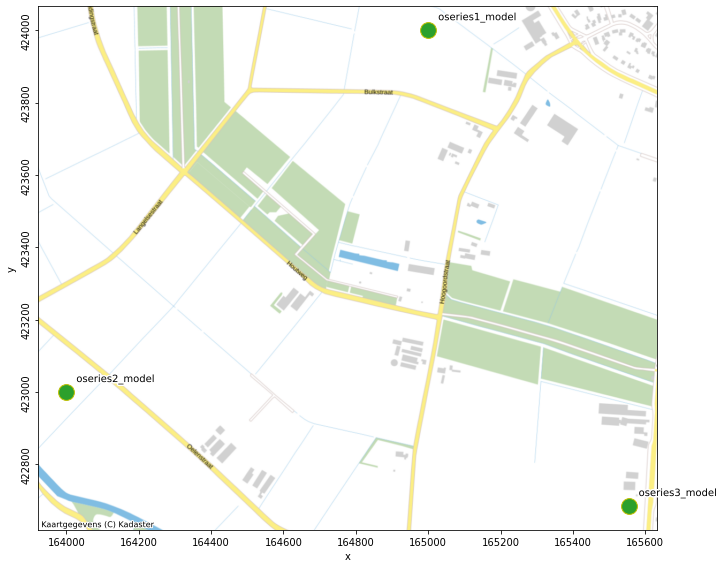

In [7]:
# create models to show
for o in pstore.oseries.index:
    ml = pstore.create_model(o, 
                             modelname=f'{o}_model', 
                             add_recharge=True)
    pstore.add_model(ml, overwrite=True)

# plot model location
ax3 = pstore.maps.models(color="C2", s=250, edgecolor="y")
pstore.maps.add_background_map(ax3, map_provider="nlmaps.standaard")

### [Model statistics](#top)

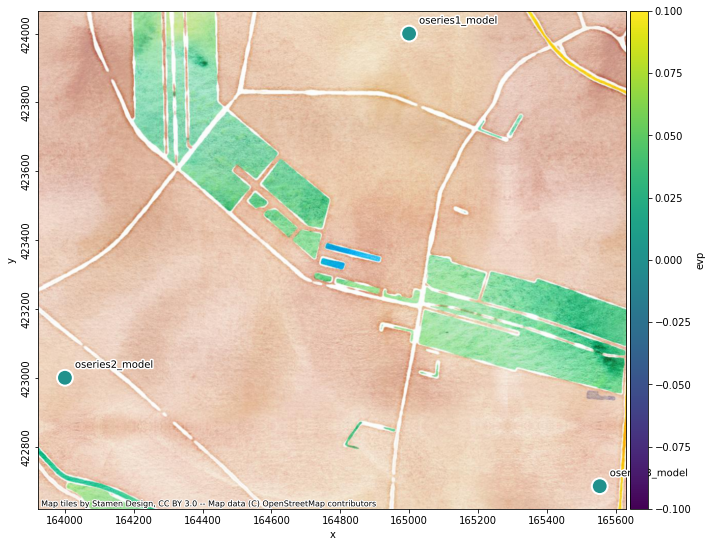

In [8]:
# plot model evp on map
ax4 = pstore.maps.modelstat("evp", s=250, edgecolors="w", linewidths=2)
pstore.maps.add_background_map(ax4, map_provider="Stamen.Watercolor")

### [A single model and its time series](#top)

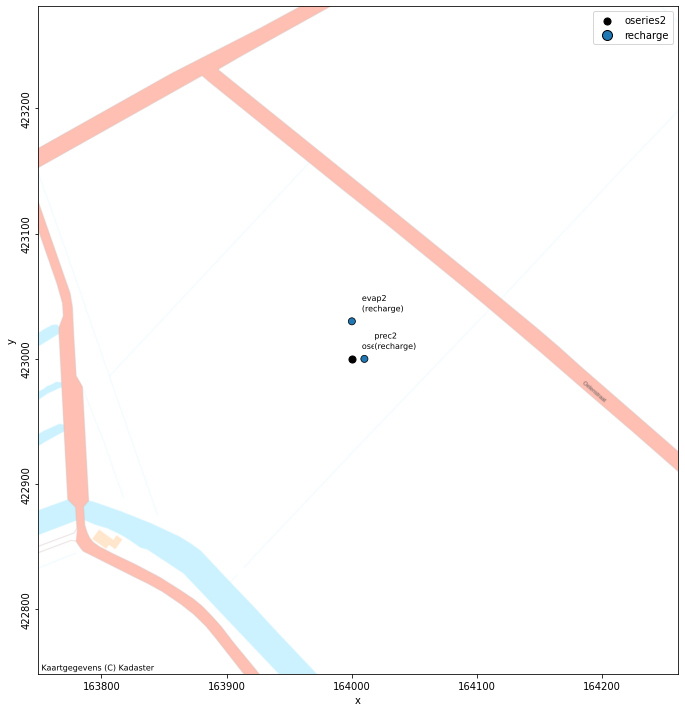

In [9]:
# plot one model, oseries and stresses
ax5 = pstore.maps.model('oseries2_model', metadata_source="store", offset=250)
pstore.maps.add_background_map(ax5, map_provider="nlmaps.pastel")

<hr>

## [Plots](#top)

A PastaStore also has a `.plots` attribute that exposes methods for plotting timeseries or an overview of data availability. The examples below run through the different methods and how they work.

### [Plot oseries](#top)

Get oseries: 100%|██████████| 3/3 [00:00<00:00, 16384.00it/s]


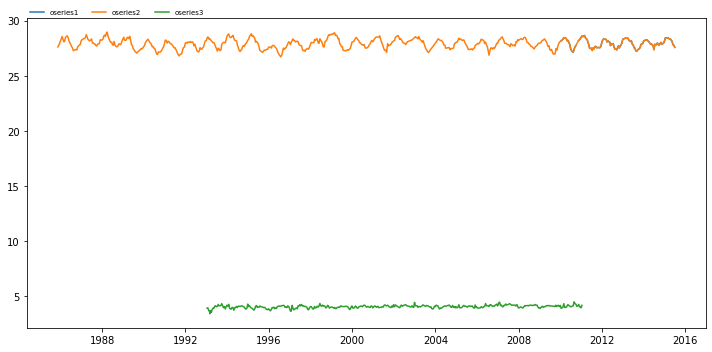

In [10]:
# plot oseries
ax6 = pstore.plots.oseries()

### [Plot stresses](#top)

When plotting stresses you can pass the `kind` argument to select only stresses of a particular kind. The `split` keyword argument allows you to plot each stress in a separate axis. Note that if there are more than 20 stresses, split is no longer supported. 

Also, you can silence the progressbar by passing `progressbar=False`.

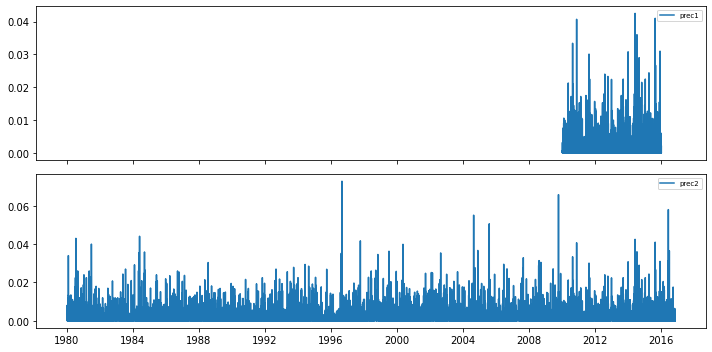

In [11]:
# plot well stresses on separate axes
ax7 = pstore.plots.stresses(kind="prec", split=True, progressbar=False)

### Data availability

Plotting data availability shows time period for which data is available and also the observation timestep. Below are three examples for oseries, all stresses, and on;y the evaporation stresses. The `set_yticks` keyword determines whether the names of the time series are used as yticks. This generally works fine if the number of time series isn't too large, but for large datasets, setting it to False is recommended.

Get oseries: 100%|██████████| 3/3 [00:00<00:00, 8665.92it/s]


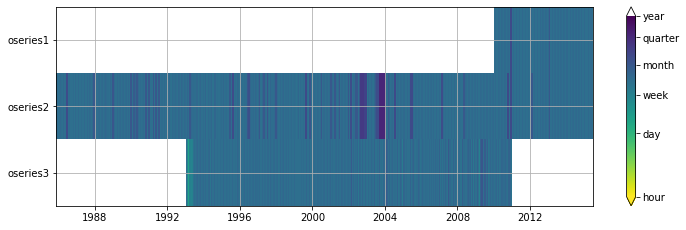

In [12]:
# plot data availability for oseries
ax8 = pstore.plots.data_availability("oseries", set_yticks=True, figsize=(10, 3))

Get stresses: 100%|██████████| 5/5 [00:00<00:00, 10677.96it/s]


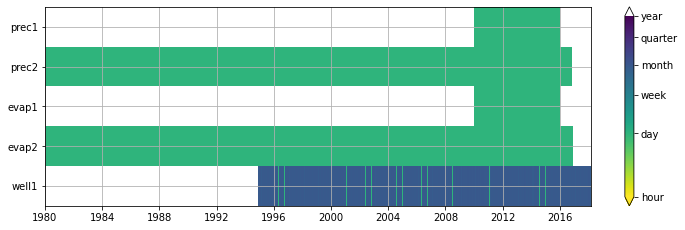

In [13]:
# plot data availability for all stresses
ax9 = pstore.plots.data_availability("stresses", set_yticks=True, figsize=(10, 3))

Get stresses: 100%|██████████| 2/2 [00:00<00:00, 12372.58it/s]


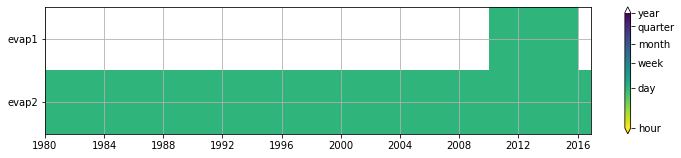

In [14]:
# plot data availability only stresses with kind="well"
ax10 = pstore.plots.data_availability("stresses", kind="evap", set_yticks=True, figsize=(10, 2))